## Building a CMIP5 Collection Catalog

### Collection Definition

Aspects of the collection catalog are defined in ``intake-esm`` configuration file that is stored in ``~/.intake_esm/config.yaml``.
This configuration file is a YAML file with the following contents:

In [1]:
!cat ~/.intake_esm/config.yaml

collections:
  cesm:
    collection_columns:
    - resource
    - resource_type
    - direct_access
    - experiment
    - case
    - component
    - stream
    - variable
    - date_range
    - ensemble
    - file_fullpath
    - file_basename
    - file_dirname
    - ctrl_branch_year
    - year_offset
    - sequence_order
    - has_ocean_bgc
    - grid
    order_by_columns:
      - sequence_order
      - file_fullpath
    required_columns:
      - sequence_order
      - file_fullpath
    component_streams:
      atm:
      - cam.h0
      - cam.h1
      - cam.h2
      - cam.h3
      - cam.h4
      - cam.h5
      - cam.h6
      - cam.h7
      - cam.h8
      glc:
      - cism.h
      - cism.h0
      - cism.h1
      - cism.h2
      - cism.h3
      - cism.h4
      - cism.h5
      - cism.h6
      - cism.h7
      - cism.h8
      ice:
      - cice.h2_06h
      - cice.h1
      - cice.h
      lnd:
      - clm2.h0
      - clm2.h1
      - clm2.h2
      - clm2.h3
      - clm2.h4
      - clm2.h5
  


``collection_columns`` consists of a list of columns to include in a collection
catalog database. This database is persisted on disk as an CSV file at the location specified by ``database_directory`` key.



### Collection Catalog Definition


Collections are built from a ``YAML`` input file or a dictionary containing nested dictionaries of entries.
An example of such a dictionary is provided below for a CMIP5 collection catalog:


In [2]:
collection_definition = {'name': 'cmip5_test_collection',
                        'collection_type': 'cmip5',
                        'data_sources': {'root_dir': {'name': 'GLADE',
                        'loc_type': 'posix',
                        'direct_access': True,
                        'urlpath': '../../../tests/sample_data/cmip/cmip5'}}}


### Building the Collection Catalog

Let's begin by importing ``intake``:

In [3]:
%matplotlib inline
import intake

/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


The main entry point in ``intake-esm`` is ``esm_metadatastore`` class.
Since the class is in the top-level of the package i.e ``__init__.py``,
and the package name starts with ``intake_``, ``intake-esm`` package is scanned
when intake is imported. Now the plugin automatically appears in the set of known
plugins in the intake registry, and an associated ``intake.open_esm_metadatastore``
function is created at import time.

In [4]:
intake.registry

{'yaml_file_cat': intake.catalog.local.YAMLFileCatalog,
 'yaml_files_cat': intake.catalog.local.YAMLFilesCatalog,
 'remote-xarray': intake_xarray.xarray_container.RemoteXarray,
 'xarray_image': intake_xarray.image.ImageSource,
 'netcdf': intake_xarray.netcdf.NetCDFSource,
 'opendap': intake_xarray.opendap.OpenDapSource,
 'rasterio': intake_xarray.raster.RasterIOSource,
 'zarr': intake_xarray.xzarr.ZarrSource,
 'esm_metadatastore': intake_esm.core.ESMMetadataStoreCatalog,
 'csv': intake.source.csv.CSVSource,
 'textfiles': intake.source.textfiles.TextFilesSource,
 'catalog': intake.catalog.base.Catalog,
 'intake_remote': intake.catalog.base.RemoteCatalog,
 'numpy': intake.source.npy.NPySource}

To build a collection catalog, we instatiate an ``esm_metadatastore`` class in ``intake-esm``
with a collection input YAML file or dictionary. For this example, we will use ``collection_definition``
dictionary defined above:

In [5]:
col = intake.open_esm_metadatastore(collection_input_definition=collection_definition,
                                       overwrite_existing=True)

Getting list of directories



Found 30 directories
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
activity           32 non-null object
ensemble_member    32 non-null object
experiment         32 non-null object
file_basename      32 non-null object
file_dirname       32 non-null object
file_fullpath      32 non-null object
frequency          32 non-null object
institute          32 non-null object
mip_table          32 non-null object
model              32 non-null object
modeling_realm     32 non-null object
product            32 non-null object
temporal_subset    32 non-null object
variable           32 non-null object
version            32 non-null object
dtypes: object(15)
memory usage: 3.8+ KB
None
Persisting cmip5_test_collection at : /Users/abanihi/.intake_esm/collections/cmip5/cmip5_test_collection.cmip5.csv



### Examining the Built Collection


``Intake-esm`` builds a ``pandas.DataFrame`` to store the collection.
The DataFrame is stored as an attribute on the collection object.

In [6]:
type(col)

intake_esm.core.ESMMetadataStoreCatalog

In [7]:
col.df.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
0,CMIP5,r3i1p1,historical,hfls_Amon_IPSL-CM5A-LR_historical_r3i1p1_18500...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,IPSL,Amon,IPSL-CM5A-LR,atmos,output1,185001-200512,hfls,v20110406
1,CMIP5,r3i1p1,rcp85,tasmax_Amon_IPSL-CM5A-LR_rcp85_r3i1p1_200601-2...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,IPSL,Amon,IPSL-CM5A-LR,atmos,output1,200601-210012,tasmax,v20110726
2,CMIP5,r7i1p1,historical,hfls_Amon_CNRM-CM5_historical_r7i1p1_195001-20...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CNRM-CERFACS,Amon,CNRM-CM5,atmos,output1,195001-200512,hfls,v20110901
3,CMIP5,r8i1p1,historical,hfls_Amon_CNRM-CM5_historical_r8i1p1_195001-20...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CNRM-CERFACS,Amon,CNRM-CM5,atmos,output1,195001-200512,hfls,v20110901
4,CMIP5,r10i1p1,rcp85,tasmax_Amon_CNRM-CM5_rcp85_r10i1p1_205601-2100...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CNRM-CERFACS,Amon,CNRM-CM5,atmos,output1,205601-210012,tasmax,v20110915


In [8]:
col.df["model"].unique()

array(['IPSL-CM5A-LR', 'CNRM-CM5', 'CanESM2', 'MPI-ESM-LR',
       'CSIRO-Mk3-6-0', 'NorESM1-M', 'BNU-ESM', 'HadGEM2-ES', 'FIO-ESM',
       'CanCM4', 'EC-EARTH', 'CESM1-BGC', 'CMCC-CESM', 'IPSL-CM5A-MR',
       'HadGEM2-AO', 'NorESM1-ME', 'MIROC-ESM', 'CESM1-CAM5', 'GISS-E2-H',
       'GISS-E2-R', 'GISS-E2-R-CC', 'CMCC-CMS'], dtype=object)

### Searching for Entries in the Built Collection Catalog

One of the features supported in ``intake-esm`` is querying the collection catalog.
This is achieved through the ``search()`` method. The ``search`` method allows the user to
specify a query by using keyword arguments. This method returns a subset of the collection
with all the entries that match the query.

In [9]:
cat = col.search(variable=['hfls'], frequency='mon',
                     modeling_realm='atmos', institute=['CCCma', 'CNRM-CERFACS'])

The query results are stored in a new `pandas.DataFrame` stored as an attribute `query_results` of the new ``intake`` catalog entry object:

In [10]:
type(cat)

intake.catalog.local.LocalCatalogEntry

In [11]:
cat.query_results.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
14,CMIP5,r4i1p1,historical,hfls_Amon_CanCM4_historical_r4i1p1_196101-2005...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CCCma,Amon,CanCM4,atmos,output1,196101-200512,hfls,v20120612
2,CMIP5,r7i1p1,historical,hfls_Amon_CNRM-CM5_historical_r7i1p1_195001-20...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CNRM-CERFACS,Amon,CNRM-CM5,atmos,output1,195001-200512,hfls,v20110901
3,CMIP5,r8i1p1,historical,hfls_Amon_CNRM-CM5_historical_r8i1p1_195001-20...,../../../tests/sample_data/cmip/cmip5/output1/...,../../../tests/sample_data/cmip/cmip5/output1/...,mon,CNRM-CERFACS,Amon,CNRM-CM5,atmos,output1,195001-200512,hfls,v20110901


In [12]:
cat.query_results.groupby(['institute', 'model', 'ensemble_member']).count()

activity  experiment  file_basename  \
institute    model    ensemble_member                                        
CCCma        CanCM4   r4i1p1                  1           1              1   
CNRM-CERFACS CNRM-CM5 r7i1p1                  1           1              1   
                      r8i1p1                  1           1              1   

                                       file_dirname  file_fullpath  frequency  \
institute    model    ensemble_member                                           
CCCma        CanCM4   r4i1p1                      1              1          1   
CNRM-CERFACS CNRM-CM5 r7i1p1                      1              1          1   
                      r8i1p1                      1              1          1   

                                       mip_table  modeling_realm  product  \
institute    model    ensemble_member                                       
CCCma        CanCM4   r4i1p1                   1               1        1   
CNRM-CERFACS CNRM-CM5 r7i1p1                   1               1        1   
                      r8i1p1                   1               1        1   

                                       temporal_subset  variable  version  
institute    model    ensemble_member                                      
CCCma        CanCM4   r4i1p1                         1         1        1  
CNRM-CERFACS CNRM-CM5 r7i1p1                         1         1        1  
                      r8i1p1                         1         1        1

### Loading Query Results into Xarray Datasets

Once you are satisfied with the results of your query, you can use the ``to_xarray()`` method to load
the data into an xarray dataset.

**NOTE**:
    

``to_xarray()`` method returns a dictionary of ``xarray`` datasets. The keys in this dictionary are constructed as follows:

- For CMIP5 data, ``key=<institute>.<model>.<experiment>.<frequency>.<modeling_realm>``
- For CMIP6 data, ``key=<institution_id>.<source_id>.<experiment_id>.<table_id>.<grid_label>``

In [13]:
ds = cat.to_xarray(decode_times=False)
ds

{'CCCma.CanCM4.historical.mon.atmos': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 5, lon: 5, time: 2)
 Coordinates:
   * time       (time) float64 4.053e+04 4.056e+04
     time_bnds  (time, bnds) float64 dask.array<shape=(2, 2), chunksize=(2, 2)>
   * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74
     lat_bnds   (lat, bnds) float64 dask.array<shape=(5, 2), chunksize=(5, 2)>
   * lon        (lon) float64 0.0 2.812 5.625 8.438 11.25
     lon_bnds   (lon, bnds) float64 dask.array<shape=(5, 2), chunksize=(5, 2)>
 Dimensions without coordinates: bnds
 Data variables:
     hfls       (time, lat, lon) float32 dask.array<shape=(2, 5, 5), chunksize=(2, 5, 5)>
 Attributes:
     institution:            CCCma (Canadian Centre for Climate Modelling and ...
     institute_id:           CCCma
     experiment_id:          historical
     source:                 CanCM4 2010 atmosphere: CanAM4 (AGCM15i, T63L35) ...
     model_id:               CanCM4
     forcing:                GHG,Oz,

In [14]:
ds.keys()

dict_keys(['CCCma.CanCM4.historical.mon.atmos', 'CNRM-CERFACS.CNRM-CM5.historical.mon.atmos'])

In [15]:
dset = ds['CNRM-CERFACS.CNRM-CM5.historical.mon.atmos']
dset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 5, lon: 5, member_id: 2, time: 2)
Coordinates:
  * time       (time) float64 3.654e+04 3.657e+04
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 -83.34
  * lon        (lon) float64 0.0 1.406 2.812 4.219 5.625
  * member_id  (member_id) <U6 'r7i1p1' 'r8i1p1'
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(2, 2), chunksize=(2, 2)>
    lat_bnds   (lat, bnds) float64 dask.array<shape=(5, 2), chunksize=(5, 2)>
    lon_bnds   (lon, bnds) float64 dask.array<shape=(5, 2), chunksize=(5, 2)>
    hfls       (member_id, time, lat, lon) float32 dask.array<shape=(2, 2, 5, 5), chunksize=(1, 2, 5, 5)>
Attributes:
    parent_experiment_id:   piControl
    institute_id:           CNRM-CERFACS
    contact:                for all but decadal predictions : contact.CMIP5@m...
    Conventions:            CF-1.4
    modeling_realm:         atmos
    comment:                Soil layers depth schem

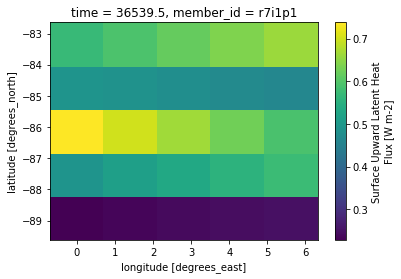

In [16]:
dset['hfls'].isel(time=0, member_id=0).plot()

In [17]:
%load_ext watermark

In [18]:
%watermark --iversion -g  -m  -v -u -d

intake 0.4.1
last updated: 2019-04-25 

CPython 3.6.7
IPython 7.1.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 149e935866c2744d86be503a2289bd48562c1d20
